In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Configuration

In [2]:
# data_file    = 'cardiacData.csv'
# data_columns = [ 'HR', 'Att', 'STE', 'Age', 'Outcome' ]
# header    = -1
data_file    = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
data_columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data_header  = None

# Import Data

In [3]:
file_data = pd.read_csv(data_file, header = data_header, names = data_columns)
# file_data.iloc[:, [0, 1, 2, 3, 4]].values
df = pd.DataFrame(file_data)

# Understanding The Data

## File Metadata

In [4]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## Data Sample

In [5]:
pd.set_option('display.max_rows', 5)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
...,...,...,...,...,...,...,...,...,...
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Describing the Data

Describing the data will show any values that have a range outside of the normal distribution. These can be standardized using a _ZScore_ for example.

In [6]:
# Reset max_rows to all rows
pd.set_option('display.max_rows', None)
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Visualization

## Histograms

A fast way to get an idea of the shape of the data, which is to say, the distribution (or density) of each attribute is to look at histograms.

Histograms represent the distribution of a continuous variable over a given interval or period of time. Histograms plot the data by dividing it into intervals called _bins_. It is used to inspect the underlying frequency distribution or shape of the data Gaussian (eg. Normal distribution), outliers, skewness, etc.

[Types of distributions](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)

**Choosing a Bin Number**

Setting bins to a higher or lower number will yeild denser or sparser results. The choice of bin width significantly affects the resulting plot. Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data.

_Matplotlib_ will automatically choose a reasonable binwidth for you, but you can specify the binwidth yourself after trying out several values. There is no true right or wrong answer, you just have to try different bin values and see which works best for your particular data.

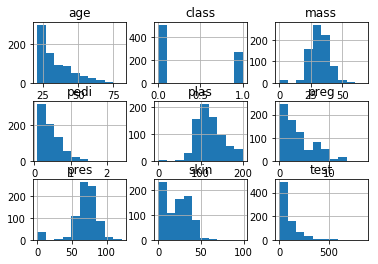

In [7]:
# Using the Data Frame we will produce histograms of each attribute
# with an optional specified number of bins. Matplotlib will automatically
# choose a reasonable binwidth for you if set to None.
df.hist(bins = None)
plt.show()

## Density Plots

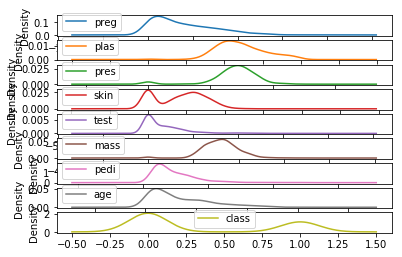

In [8]:
# Univariate Density Plots
df.plot(kind = 'density', subplots = True, layout = (len(data_columns), 1), sharex = False)
plt.show()

## Box-And-Whisker Plot

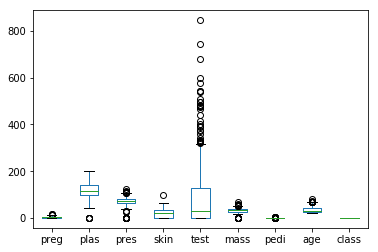

In [9]:
df.plot(kind = 'box')
plt.show()

## Scatter Matrix

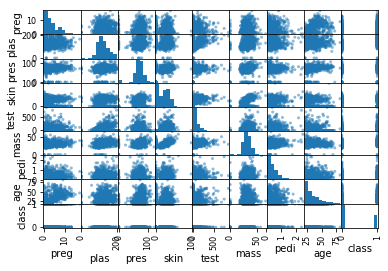

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(file_data)
plt.show()

# Data Pre-Processing

# Find K

## Elbow Method (Sum of Squared Errors)

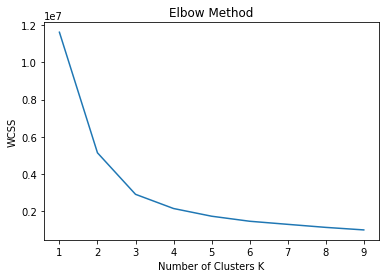

In [11]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []
samples = 10

# Try different values for k and record the results.
for k in range(1, samples):
    kmeans = KMeans(k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(file_data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, samples), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
# Average Within Cluster Distances to Centroid
# or Within Cluster Sum of Squares
plt.ylabel('WCSS')
plt.show()